In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # only for verifying answer

In [2]:
#checks if two arrays are equal an returns True iff all values are same
def equalFinder(A,B):
    row = np.shape(A)[0]
    flag = True
    for i in range(row):
        if(A[i] - B[i] != 0):
            flag = False
            break;

    return flag

### Above function is used to check if cluster labels are changing wrt previous iteration,
### But we can also say norm of vector difference should be zero; using which we can avoid using this method

In [3]:
k = int(input("Enter number of clusters: "))
n = int(input("Enter number of datapoints: "))
dim = int(input("Enter dimension in which datapoints exist: "))
data = np.random.randint(-3*n,3*n,size = (n,dim))#generating data points in 'n'dim space; 3 is to spread data points
B = np.arange(k)#assuming initial cluster center
#B = np.random.randint(n,size = (k)) can be done but sometimes values were repeating due to which Nan is obtained
centroids = np.array(data[B][:] , dtype = 'float32')
#print(f"Data points in column space: \n{data}")
print(f"Dimension of Data points: {np.shape(data)}")
print(f"Initial assumed cluster centers: \n{centroids}")
print(f"Dimension of cluster center: {np.shape(centroids)}\n")

Enter number of clusters:  3
Enter number of datapoints:  20
Enter dimension in which datapoints exist:  2


Dimension of Data points: (20, 2)
Initial assumed cluster centers: 
[[-33.  -9.]
 [-48.  55.]
 [ 44. -58.]]
Dimension of cluster center: (3, 2)



### In below block, I'm executing till class labels don't change, I tried the usual way wherein we check
### if cluster centres don't change...but in that case, some were wrongly grouped to wrong cluster

In [4]:
iter = 0 #to keep track of total iterations performed 
clust_label = np.zeros((n))# assumin that all initially become to cluster 0
eucl_dist = np.zeros((n,k))# initialising euclidean distance matrix
while(True):
    iter = iter + 1
    #finding euclidean distance of each data point from all cluster centres
    for i in range(n):
        for j in range(k):
            eucl_dist[i][j] = np.linalg.norm(centroids[j][:]-data[i][:])
    #print(eucl_dist)
    temp = np.array(np.argmin(eucl_dist,axis=1), dtype = 'float32')#temporary allocation for present iteration
    print(f"Cluster labels in prev. iter : {clust_label}")
    print(f"New Cluster labels: {temp}")
    
    
    for i in range(k):
        points = data[np.where(temp==i)][:]#finding cluster labels for each point
        #print(f"Points in cluster {i}: \n{points}\n") #printing points in corresponding cluster
        for sp in range(dim):
            centroids[i][sp] = np.mean(points[:,sp])#finding new centroid using newly allocated cluster points
    
    print(f"Calculated new centroid:\n{centroids}\n")
    
    
    if(equalFinder(clust_label,temp) == True):
    #if(np.linalg.norm(clust_label - temp) == 0)
        print("Since initial clustering is same as final, we terminate execution")
        break
    else:
        clust_label = temp
    print("""
          
          """)
print(f"Final Clustering groups: {clust_label}")
print(f"Final Cluster centres: \n{centroids}")
print(f"Total Iterations: {iter}")

Cluster labels in prev. iter : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Cluster labels: [0. 1. 2. 0. 0. 0. 0. 1. 1. 0. 1. 2. 2. 0. 0. 0. 0. 2. 0. 2.]
Calculated new centroid:
[[-14.545455   -4.3636365]
 [-29.         50.       ]
 [ 43.        -28.6      ]]


          
          
Cluster labels in prev. iter : [0. 1. 2. 0. 0. 0. 0. 1. 1. 0. 1. 2. 2. 0. 0. 0. 0. 2. 0. 2.]
New Cluster labels: [0. 1. 2. 1. 0. 0. 0. 1. 1. 0. 1. 2. 2. 0. 0. 0. 0. 2. 0. 2.]
Calculated new centroid:
[[-17.1  -8.1]
 [-21.   46.6]
 [ 43.  -28.6]]


          
          
Cluster labels in prev. iter : [0. 1. 2. 1. 0. 0. 0. 1. 1. 0. 1. 2. 2. 0. 0. 0. 0. 2. 0. 2.]
New Cluster labels: [0. 1. 2. 1. 0. 0. 0. 1. 1. 0. 1. 2. 2. 0. 1. 0. 0. 2. 0. 2.]
Calculated new centroid:
[[-22.       -12.      ]
 [-13.        43.333332]
 [ 43.       -28.6     ]]


          
          
Cluster labels in prev. iter : [0. 1. 2. 1. 0. 0. 0. 1. 1. 0. 1. 2. 2. 0. 1. 0. 0. 2. 0. 2.]
New Cluster labels: [0. 1. 2. 1

## Plotting to visualise Cluster spread 

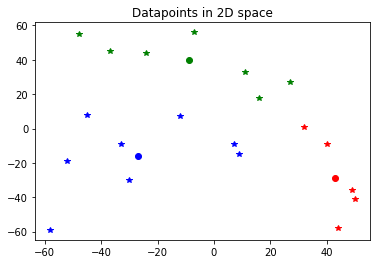

In [5]:
if(dim == 2):
    for i in range(n):
        if(clust_label[i] == 0):
            plt.plot(data[i,0],data[i,1],"*",color="blue")
        elif(clust_label[i]  == 1):
            plt.plot(data[i,0],data[i,1],"*",color="green")
        elif(clust_label[i] == 2):
            plt.plot(data[i,0],data[i,1],"*",color="red")
        else:
            plt.plot(data[i,0],data[i,1],"*",color="black")   
            
    for i in range(k):
        if(i == 0):
            plt.plot(centroids[i,0],centroids[i,1],"o",color="blue")
        elif(i == 1):    
            plt.plot(centroids[i,0],centroids[i,1],"o",color="green")
        elif(i == 2):
            plt.plot(centroids[i,0],centroids[i,1],"o",color="red")
        else:
            plt.plot(centroids[i,0],centroids[i,1],"o",color="black")
    
    plt.title("Datapoints in 2D space")
    
else: 
    print("Can't visualise clustering for points in higher dimension space")

In [6]:
model = KMeans(n_clusters = k).fit(data)

#### Using inbulit KMeans with scikitlearn just to verify output; 
#### Some executions may give jumbled labels; but points will be in same cluster
#### We just need to map values with our result

In [7]:
model.labels_

array([2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1])

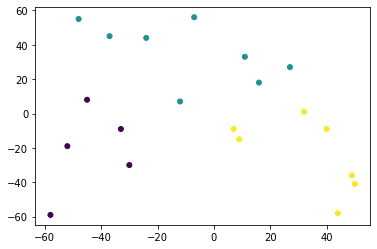

In [8]:
labels = KMeans(k, random_state=0).fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels,
            s=25, cmap='viridis');

### Some point vary depending on starting cluster center